In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log
from scipy.interpolate import interp1d
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sage.plot.plot3d.parametric_surface import ParametricSurface
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import fsolve
from sympy import symbols, Eq, solve

In [ ]:
# #### Getting the full data:

# pages = np.arange(1, 19) # total amount of pages is returned in the request
# per_page = 100
# for page in pages:
#     pagination = f"?page={page}&per_page={per_page}&"
#     filters = "start=%s&end=%s" % ("2004-01-01", "2008-12-31")

#     resp = requests.get(climate_api + pagination + filters)

# # Or you can add a geocode to the filters
# geocode = 1302603
# resp = requests.get(
#     climate_api + 
#     pagination + 
#     filters +
#     f"&geocode={geocode}"
# )

# items = resp.json()["items"] # JSON data in dict format
# #total_items = resp.json()["total_items"] # JSON data in dict format
# resp.json()["pagination"] # Pagination*

In [ ]:
# total_pages = 18 
# start_date = "2004-01-01"
# end_date = "2008-12-31"
# geocode = 1302603

# all_items = []  # List to store all items

# # Loop through each page
# for page in range(1, total_pages + 1):
#     pagination = f"?page={page}&per_page={per_page}&"
#     filters = f"start={start_date}&end={end_date}&geocode={geocode}"
    
#     resp = requests.get(climate_api + pagination + filters)
    
#     # Check if the request was successful
#     if resp.status_code == 200:
#         items = resp.json().get("items", [])  # Get items, default to an empty list if key not found
#         all_items.extend(items)  # Append the items from this page to the list
#     else:
#         print(f"Failed to retrieve data for page {page}")
#         break  # Break the loop in case of a failed request

# df = pd.DataFrame(all_items)
# df

In [3]:
# Loading the CSV file
df = pd.read_csv('climate_api_data.csv')

df

,date,geocodigo,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressao_min,pressao_med,pressao_max,umid_min,umid_med,umid_max
0,2004-01-01,1302603,24.7052,26.7748,30.5519,0.0000,0.7406,3.0196,5.9251,0.9951,0.9980,1.0012,75.0331,87.1228,94.9243
1,2004-01-02,1302603,24.5850,26.8201,30.1501,0.0212,0.7749,3.4790,6.1993,0.9937,0.9971,0.9990,74.2346,86.2345,95.9302
2,2004-01-03,1302603,24.2967,26.2160,28.7951,0.0028,0.5410,1.0341,4.3277,0.9933,0.9962,0.9981,80.7129,89.0086,93.7411
3,2004-01-04,1302603,24.4803,26.0561,28.5809,0.0006,0.3706,1.8163,2.9649,0.9925,0.9951,0.9970,76.6341,88.7608,94.3893
4,2004-01-05,1302603,24.1931,25.6888,28.6974,0.0647,0.8415,2.1096,6.7318,0.9938,0.9955,0.9973,80.7770,90.8974,94.9595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2008-12-27,1302603,24.2679,25.8514,28.0496,0.1398,0.7252,3.4506,5.8018,0.9920,0.9947,0.9974,77.0052,88.3014,94.0025
1780,2008-12-28,1302603,24.4061,26.4017,29.3633,0.0103,0.8356,3.8776,6.6847,0.9933,0.9952,0.9975,75.8251,88.0135,94.8036
1781,2008-12-29,1302603,24.1979,26.7066,31.0737,0.0353,0.4734,1.2593,3.7872,0.9917,0.9953,0.9977,70.3917,86.7352,94.0349
1782,2008-12-30,1302603,23.8070,24.7968,26.8158,0.4586,6.8408,23.2136,54.7267,0.9943,0.9959,0.9984,86.4121,91.5930,94.2908


In [4]:
datetime_df = pd.DataFrame()
datetime_df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
datetime_df['year'] = datetime_df['date'].dt.year

# Count the occurrences of each year
year_counts = datetime_df['year'].value_counts().sort_index()

print(year_counts)

2004    341
2005    347
2006    365
2007    365
2008    366
Name: year, dtype: int64


In [5]:
specific_year = 2004

# Ensure 'date' column is in datetime format
datetime_df['date'] = pd.to_datetime(datetime_df['date'])

# Filter the DataFrame for the specific year
df_year = datetime_df[datetime_df['date'].dt.year == specific_year]

# Extract the month from the 'date' column
df_year['month'] = df_year['date'].dt.month

# Count the occurrences of each month
month_counts = df_year['month'].value_counts().sort_index()

print(month_counts)

1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12     6
Name: month, dtype: int64


/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
specific_year = 2005

# Ensure 'date' column is in datetime format
datetime_df['date'] = pd.to_datetime(datetime_df['date'])

# Filter the DataFrame for the specific year
df_year = datetime_df[datetime_df['date'].dt.year == specific_year]

# Extract the month from the 'date' column
df_year['month'] = df_year['date'].dt.month

# Count the occurrences of each month
month_counts = df_year['month'].value_counts().sort_index()

print(month_counts)

1     31
2     10
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: month, dtype: int64


/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
#### Missing data for December 2004 (only 26 to 31) and February 2005 (only 1 to 10)

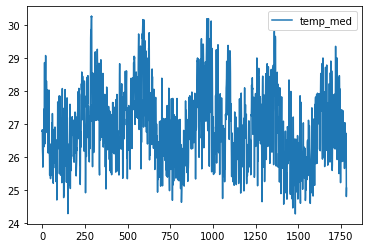

In [8]:
df.plot(kind='line', y='temp_med');
plt.show()

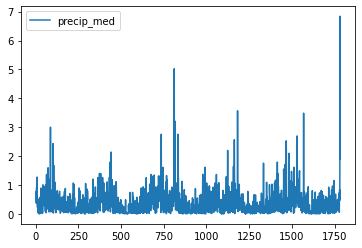

In [9]:
df.plot(kind='line', y='precip_med');
plt.show()

In [10]:
#### Article parameters:

T_prime=19.9

T1=23.2
T2=0.07
omega1=0.67
phi1=1.53

R1=85.9
R2=0.98
omega2=0.65
phi2=1.99

B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.04
A=-0.03
B=1.31
C=-4.4
b2=0.09
tau_H=10
DD=105
Tmin=14.5
gamma= 1/120
R_L = 50
N=8558
M= 10000  #0
E_M0=1 #0 # None
I_H0=1 
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0
S_M0 = M - E_M0

# Defining the functions of temperature and precipitation
#def T(t):
#        return T1 * (1 + T2 * cos(omega1 * t - phi1))

#def R(t):
#        return R1 * (1 + R2 * cos(omega2 * t - phi2))

In [11]:
def Temp():
    return df['temp_med']

def Rain():
    return df['precip_med']

In [12]:
Temp()

0       26.7748
1       26.8201
2       26.2160
3       26.0561
4       25.6888
         ...   
1779    25.8514
1780    26.4017
1781    26.7066
1782    24.7968
1783    25.0496
Name: temp_med, Length: 1784, dtype: float64

In [13]:
Rain()

0       0.7406
1       0.7749
2       0.5410
3       0.3706
4       0.8415
         ...  
1779    0.7252
1780    0.8356
1781    0.4734
1782    6.8408
1783    1.8999
Name: precip_med, Length: 1784, dtype: float64

In [14]:
def original_model(t, z, df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0, T_prime):
    
    S_H, I_H, R_H, S_M, E_M, I_M = z
    
#     Temperature and rain functions
#     def Temp(t):
#         return T1 * (1 + T2 * cos(omega1 * t - phi1))

#     def Rain(t):
#         return R1 * (1 + R2 * cos(omega2 * t - phi2))

#     R_curr = Rain(t)
#     T_curr = Temp(t)
    
    # Get the closest integer day to use for indexing
    day_index = int(t)  

    if day_index >= len(df):
        day_index = len(df) - 1  # To avoid out-of-bounds issues
    
    T_curr = df.loc[day_index, 'temp_med']
    R_curr = df.loc[day_index, 'precip_med']
    
    # Duration of larval development phase
    def tau_L(Temp):
        return 1 / (c1 * Temp + c2)
    
    # Daily survival rate of mosquitoes
    def p(Temp):
        return np.exp(-1 / (A * Temp**2 + B * Temp + C))
    
    # Larval survival probability dependent on temperature and rain
    def p_LT(Temp):
        return np.exp(-(c1 * Temp + c2))
    
    def p_LR(Rain):
        return (4 * p_ML / R_L**2) * Rain * (R_L - Rain)
    
    def p_LRT(Rain, Temp):
        return p_LR(Rain) * p_LT(Temp)
    
    # Egg and pupa survival probability dependent on rain
    def p_ER(Rain):
        return (4 * p_ME / R_L**2) * Rain * (R_L - Rain)
    
    def p_PR(Rain):
        return (4 * p_MP / R_L**2) * Rain * (R_L - Rain)

    # Duration of the sporogonic cycle
    def tau_M(Temp):
        return DD / (Temp - Tmin)
    
    tau_M_curr = tau_M(T_curr)

    # Defining the mosquito survival function
    def l_tau_M(tau_M, Temp):  
        p_T = p(Temp)
        return p_T**tau_M
    
    l_curr = l_tau_M(tau_M_curr, T_curr)

    # Defining the mosquito mortality rate
    def mu(Temp):
        return -np.log(p(Temp))
    
    mu_curr = mu(T_curr)
    
    # Calculate the biting rate and transmission probability
    def a(Temp):
        return (Temp - T_prime) / D1
    
    a_curr = a(T_curr)
    
    def b(Rain, Temp):
        return B_E * p_ER(Rain) * p_LRT(Rain, Temp) * p_PR(Rain) / (tau_E + tau_L(Temp) + tau_P)
    
    b_curr = b(R_curr, T_curr)
    
    dShdt = -a_curr * b2 * (I_M0 / N) * S_H
    dIhdt = a_curr * b2 * (I_M0 / N) * S_H - gamma * I_H
    dRhdt = gamma * I_H
    
    dSmdt = b_curr - a_curr * b1 * (I_H0 / N) * S_M - mu_curr * S_M
    dEmdt = a_curr * b1 * (I_H0 / N) * S_M - mu_curr * E_M - a_curr * b1 * (I_H0 / N) * S_M * l_curr
    dImdt = a_curr * b1 * (I_H0 / N) * S_M * l_curr - mu_curr * I_M
    
    return [dShdt, dIhdt, dRhdt, dSmdt, dEmdt, dImdt]

In [15]:
args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0, T_prime)

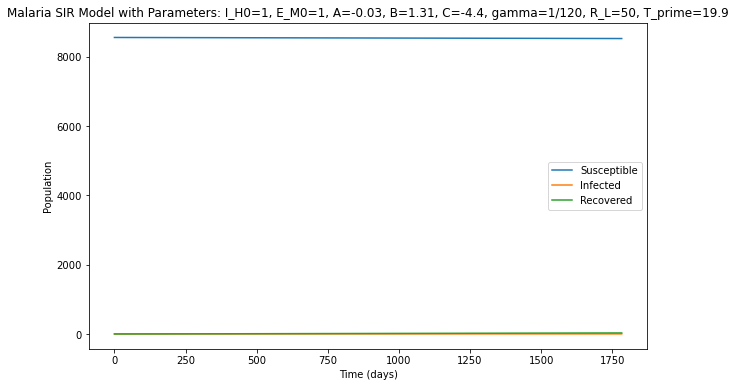

In [17]:
t_eval = np.linspace(0, 1783, 1000)  # Evaluate the solution at 1000 points between 0 and 1783
sol = solve_ivp(original_model, [0, 1783], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

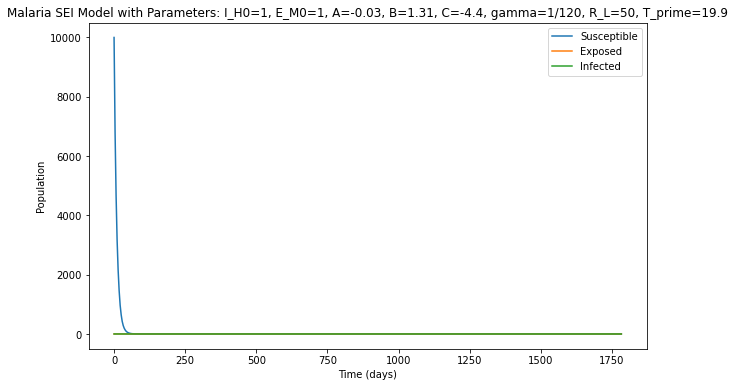

In [18]:
t_eval = np.linspace(0, 1783, 1000)  # Evaluate the solution at 1000 points between 0 and 1783
sol = solve_ivp(original_model, [0, 1783], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Susceptible')
plt.plot(times, E_M, label='Exposed')
plt.plot(times, I_M, label='Infected')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SEI Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

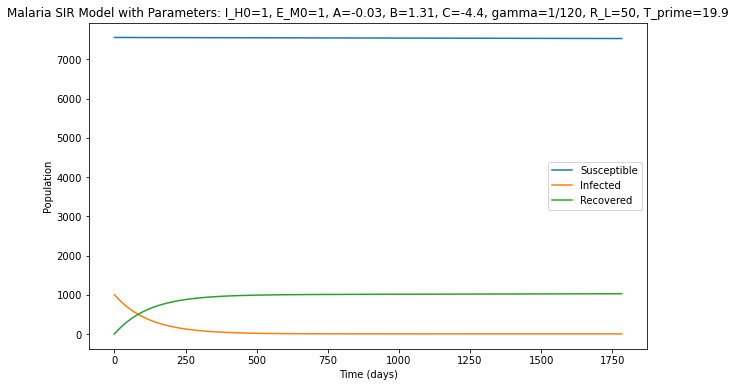

In [19]:
t_eval = np.linspace(0, 1783, 1000)  # Evaluate the solution at 1000 points between 0 and 1783
sol = solve_ivp(original_model, [0, 1783], [N-1000, 1000, 0, M-5000, 5000, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

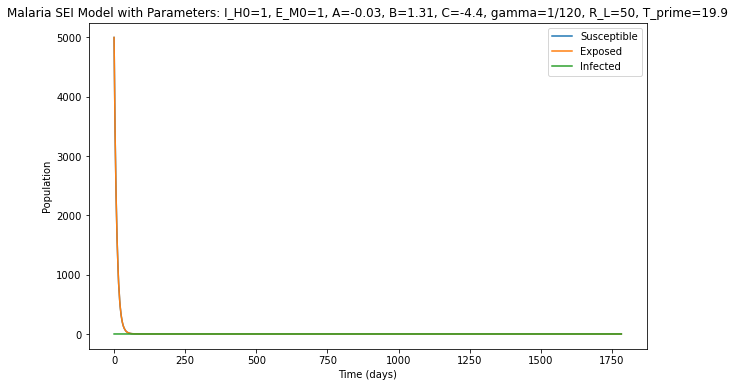

In [20]:
t_eval = np.linspace(0, 1783, 1000)  # Evaluate the solution at 1000 points between 0 and 1783
sol = solve_ivp(original_model, [0, 1783], [N-1000, 1000, 0, M-5000, 5000, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Susceptible')
plt.plot(times, E_M, label='Exposed')
plt.plot(times, I_M, label='Infected')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SEI Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [ ]:
#### As seen in the original paper, the function uses T_1 for two different things

### Using T_prime with the value of T1:

args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0, T1)